In [80]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
from torch.autograd import Variable

# hyper parameters
input_size = 1
output_size = 1
learning_rate = 0.01
num_of_epoch = 100

# data preprocessing
#data = np.loadtxt('data/linear_regression.txt', unpack=True, dtype=np.float32, delimiter=',')

#x_data, y_data = data[0], data[1]
#x_data = torch.from_numpy(np.reshape(x_data, (len(x_data), 1)))
#y_data = torch.from_numpy(np.reshape(y_data, (len(y_data), 1)))

x_data = torch.from_numpy(np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32))

y_data = torch.from_numpy(np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32))


In [81]:
class LinearRegression(nn.Module):
    def __init__(self, input_s, output_s):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_s, output_s)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [82]:
LR = LinearRegression(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(LR.parameters(), lr=learning_rate)

In [86]:
for epoch in range(num_of_epoch):
    optimizer.zero_grad()
    output = LR(Variable(x_data))
    loss = criterion(output, Variable(y_data))
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_of_epoch, loss.data[0]))

Epoch [10/100], Loss: 0.1743
Epoch [20/100], Loss: 0.1741
Epoch [30/100], Loss: 0.1738
Epoch [40/100], Loss: 0.1736
Epoch [50/100], Loss: 0.1733
Epoch [60/100], Loss: 0.1731
Epoch [70/100], Loss: 0.1729
Epoch [80/100], Loss: 0.1727
Epoch [90/100], Loss: 0.1725
Epoch [100/100], Loss: 0.1723


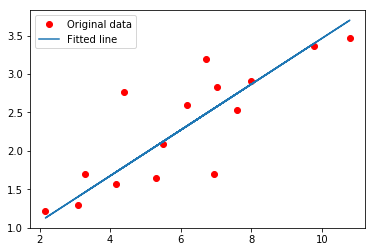

In [84]:
# Plot the graph
predicted = LR(Variable(x_data)).data.numpy()
plt.plot(x_data.numpy(), y_data.numpy(), 'ro', label='Original data')
plt.plot(x_data.numpy(), predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the Model
torch.save(LR.state_dict(), 'model.pkl')